# Project 4 Data Wrangling for We rate Dogs

### Introduction
This is a project about the rating of dogs from WeRateDogs Twitter archive. Here I will wrangle data from 3 main source. The first dataset is from WeRateDogs Twitter archive which can be downloaded manually as twitter_archive_enhanced.csv. The second dataset is image_predictions.tsv which i will download using the request library. Lastly, I will query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import requests as request
import json 
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering Data

In [2]:
# Reading the twitter_archive_enhanced.csv using pandas.
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Downloading image prediction programmatically.
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = request.get(url)
with open('image-predictions.tsv',mode='wb') as file:
    file.write(r.content)

In [4]:
# Reading the image_predictions tsv file into a dataFrame
df_image_pred = pd.read_csv("image-predictions.tsv", sep='\t') 

In [5]:
# Reading the tweet_json file and extracting the necessary columns
tweet_data = []
with open('tweet_json.txt') as file:
    for json_data in file:
        try:
            data = json.loads(json_data)
            tweet_data.append(data)
        except:
            continue
    file.close()
tweet = []
for x in tweet_data:
    tweet.append({'tweet_id': x['id'],'favorite_count': x['favorite_count'],'retweet_count': x['retweet_count']})
# Appending the data into a dataFrame
df_tweet = pd.DataFrame(tweet, columns = ['tweet_id','favorite_count','retweet_count'])

## Assessing Data

#### Twitter archive Table

In [6]:
df_twitter

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [7]:
df_image_pred

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [8]:
df_tweet

tweet_id  favorite_count  retweet_count
0     892420643555336193           39467           8853
1     892177421306343426           33819           6514
2     891815181378084864           25461           4328
3     891689557279858688           42908           8964
4     891327558926688256           41048           9774
5     891087950875897856           20562           3261
6     890971913173991426           12041           2158
7     890729181411237888           56848          16716
8     890609185150312448           28226           4429
9     890240255349198849           32467           7711
10    890006608113172480           31166           7624
11    889880896479866881           28268           5156
12    889665388333682689           38818           8538
13    889638837579907072           27672           4735
14    889531135344209921           15359           2321
15    889278841981685760           25652           5637
16    888917238123831296           29611           4709
17    888804989199671297           26080           4559
18    888554962724278272           20290           3732
19    888078434458587136           22201           3653
20    887705289381826560           30779           5609
21    887517139158093824           46959          12082
22    887473957103951883           69871          18781
23    887343217045368832           34222          10737
24    887101392804085760           31061           6167
25    886983233522544640           35859           8084
26    886736880519319552           12306           3443
27    886680336477933568           22798           4610
28    886366144734445568           21524           3316
29    886267009285017600             117              4
...                  ...             ...            ...
2324  666411507551481857             459            339
2325  666407126856765440             113             44
2326  666396247373291520             172             92
2327  666373753744588802             194            100
2328  666362758909284353             804            595
2329  666353288456101888             229             77
2330  666345417576210432             307            146
2331  666337882303524864             204             96
2332  666293911632134144             522            368
2333  666287406224695296             152             71
2334  666273097616637952             184             82
2335  666268910803644416             108             37
2336  666104133288665088           14765           6871
2337  666102155909144576              81             16
2338  666099513787052032             164             73
2339  666094000022159362             169             79
2340  666082916733198337             121             47
2341  666073100786774016             335            174
2342  666071193221509120             154             67
2343  666063827256086533             496            232
2344  666058600524156928             115             61
2345  666057090499244032             304            146
2346  666055525042405380             448            261
2347  666051853826850816            1253            879
2348  666050758794694657             136             60
2349  666049248165822465             111             41
2350  666044226329800704             311            147
2351  666033412701032449             128             47
2352  666029285002620928             132             48
2353  666020888022790149            2535            532

[2354 rows x 3 columns]

In [9]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [12]:
all_columns = pd.Series(list(df_twitter) + list(df_image_pred) + list(df_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [13]:
list(df_twitter)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Missing values

In [14]:
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
df_twitter.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [16]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Invalid DataTypes

In [17]:
df_twitter.tweet_id.dtypes

dtype('int64')

In [18]:
df_twitter.timestamp.dtypes

dtype('O')

### Invalid Names

In [19]:
df_twitter.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

### Invalid Rating denominator value

In [20]:
# Checking Rating column for invalid denominator value.
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

####  Image Prediction Table

In [21]:
df_image_pred

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [22]:
df_image_pred.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [23]:
df_image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Invalid Datatypes

In [25]:
df_image_pred.tweet_id.dtypes

dtype('int64')

### Undescriptive Column name 

In [26]:
list(df_image_pred)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Counting false prediciton for dog breed

In [27]:
#checking for rows where prediction in p1 for dogs is false
df_image_pred[df_image_pred['p1_dog']== False].shape[0]

543

In [28]:
#checking for rows where prediction in p2 for dogs is false
df_image_pred[df_image_pred['p2_dog']== False].shape[0]

522

In [29]:
#checking for rows where prediction in p3 for dogs is false
df_image_pred[df_image_pred['p3_dog']== False].shape[0]

576

#### Tweet table

In [30]:
df_tweet

tweet_id  favorite_count  retweet_count
0     892420643555336193           39467           8853
1     892177421306343426           33819           6514
2     891815181378084864           25461           4328
3     891689557279858688           42908           8964
4     891327558926688256           41048           9774
5     891087950875897856           20562           3261
6     890971913173991426           12041           2158
7     890729181411237888           56848          16716
8     890609185150312448           28226           4429
9     890240255349198849           32467           7711
10    890006608113172480           31166           7624
11    889880896479866881           28268           5156
12    889665388333682689           38818           8538
13    889638837579907072           27672           4735
14    889531135344209921           15359           2321
15    889278841981685760           25652           5637
16    888917238123831296           29611           4709
17    888804989199671297           26080           4559
18    888554962724278272           20290           3732
19    888078434458587136           22201           3653
20    887705289381826560           30779           5609
21    887517139158093824           46959          12082
22    887473957103951883           69871          18781
23    887343217045368832           34222          10737
24    887101392804085760           31061           6167
25    886983233522544640           35859           8084
26    886736880519319552           12306           3443
27    886680336477933568           22798           4610
28    886366144734445568           21524           3316
29    886267009285017600             117              4
...                  ...             ...            ...
2324  666411507551481857             459            339
2325  666407126856765440             113             44
2326  666396247373291520             172             92
2327  666373753744588802             194            100
2328  666362758909284353             804            595
2329  666353288456101888             229             77
2330  666345417576210432             307            146
2331  666337882303524864             204             96
2332  666293911632134144             522            368
2333  666287406224695296             152             71
2334  666273097616637952             184             82
2335  666268910803644416             108             37
2336  666104133288665088           14765           6871
2337  666102155909144576              81             16
2338  666099513787052032             164             73
2339  666094000022159362             169             79
2340  666082916733198337             121             47
2341  666073100786774016             335            174
2342  666071193221509120             154             67
2343  666063827256086533             496            232
2344  666058600524156928             115             61
2345  666057090499244032             304            146
2346  666055525042405380             448            261
2347  666051853826850816            1253            879
2348  666050758794694657             136             60
2349  666049248165822465             111             41
2350  666044226329800704             311            147
2351  666033412701032449             128             47
2352  666029285002620928             132             48
2353  666020888022790149            2535            532

[2354 rows x 3 columns]

In [31]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [32]:
df_tweet.tweet_id.dtypes

dtype('int64')

### Quality Issues

#### `Twitter archive` table
* 1. missing data: retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id, in_reply_to_user_id and expanded_urls contains a lot of missing values. Columns must be removed.
* 2. tweet_id is a string not an integer.
* 3. Timestamp: timestamp column has object dtype instead of datetime dtype.
* 4. invalid character in dog name : Dog names in the name column  contains several values that are not dog names, like 'a', 'an', 'the', 'such', etc. should be dropped.
* 5. Rating: rating_denominator has values other than 10 should be fixed.


#### `Image Prediction` table
*  6. tweet_id is a string not an integer.
*  7. False prediction for dog breed needs to be removed.
*  8. Rename undescriptive columns.
* 9. Drop colums with less dog breed with less image prediction, and select the one with higest image prediction for dog breed.
* 10. Drop image_url and image_num

#### `Tweet` table
*  11. tweet_id data type is integer instead of object (string).

#### Tidiness issues
#### `Twitter Table`
* 1. Merge columns: Merge doggo, floofer, pupper, puppo columns which are seperate columns to one column. i.e (dog_stage)
* 2. Create a rating column by dividing rating_numerator/rating_denominator
#### `Create Master Dataframe`
* 3. Merge tweets_clean_df,image_pred_clean_df with twit_archive_clean_df to make one master dataframe

 ## Clean

In [33]:
# Make a copy of all the dataframe for cleaning

twitter_clean = df_twitter.copy()
image_pred_clean = df_image_pred.copy()
tweet_clean = df_tweet.copy()

### Twitter Table

#### Define
* 1. Drop columns with missing data.

#### Code

In [34]:
twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp', 'expanded_urls'],axis = 1,inplace = True)

#### Test

In [35]:
twitter_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
5     891087950875897856  2017-07-29 00:08:17 +0000   
6     890971913173991426  2017-07-28 16:27:12 +0000   
7     890729181411237888  2017-07-28 00:22:40 +0000   
8     890609185150312448  2017-07-27 16:25:51 +0000   
9     890240255349198849  2017-07-26 15:59:51 +0000   
10    890006608113172480  2017-07-26 00:31:25 +0000   
11    889880896479866881  2017-07-25 16:11:53 +0000   
12    889665388333682689  2017-07-25 01:55:32 +0000   
13    889638837579907072  2017-07-25 00:10:02 +0000   
14    889531135344209921  2017-07-24 17:02:04 +0000   
15    889278841981685760  2017-07-24 00:19:32 +0000   
16    888917238123831296  2017-07-23 00:22:39 +0000   
17    888804989199671297  2017-07-22 16:56:37 +0000   
18    888554962724278272  2017-07-22 00:23:06 +0000   
19    888202515573088257  2017-07-21 01:02:36 +0000   
20    888078434458587136  2017-07-20 16:49:33 +0000   
21    887705289381826560  2017-07-19 16:06:48 +0000   
22    887517139158093824  2017-07-19 03:39:09 +0000   
23    887473957103951883  2017-07-19 00:47:34 +0000   
24    887343217045368832  2017-07-18 16:08:03 +0000   
25    887101392804085760  2017-07-18 00:07:08 +0000   
26    886983233522544640  2017-07-17 16:17:36 +0000   
27    886736880519319552  2017-07-16 23:58:41 +0000   
28    886680336477933568  2017-07-16 20:14:00 +0000   
29    886366144734445568  2017-07-15 23:25:31 +0000   
...                  ...                        ...   
2326  666411507551481857  2015-11-17 00:24:19 +0000   
2327  666407126856765440  2015-11-17 00:06:54 +0000   
2328  666396247373291520  2015-11-16 23:23:41 +0000   
2329  666373753744588802  2015-11-16 21:54:18 +0000   
2330  666362758909284353  2015-11-16 21:10:36 +0000   
2331  666353288456101888  2015-11-16 20:32:58 +0000   
2332  666345417576210432  2015-11-16 20:01:42 +0000   
2333  666337882303524864  2015-11-16 19:31:45 +0000   
2334  666293911632134144  2015-11-16 16:37:02 +0000   
2335  666287406224695296  2015-11-16 16:11:11 +0000   
2336  666273097616637952  2015-11-16 15:14:19 +0000   
2337  666268910803644416  2015-11-16 14:57:41 +0000   
2338  666104133288665088  2015-11-16 04:02:55 +0000   
2339  666102155909144576  2015-11-16 03:55:04 +0000   
2340  666099513787052032  2015-11-16 03:44:34 +0000   
2341  666094000022159362  2015-11-16 03:22:39 +0000   
2342  666082916733198337  2015-11-16 02:38:37 +0000   
2343  666073100786774016  2015-11-16 01:59:36 +0000   
2344  666071193221509120  2015-11-16 01:52:02 +0000   
2345  666063827256086533  2015-11-16 01:22:45 +0000   
2346  666058600524156928  2015-11-16 01:01:59 +0000   
2347  666057090499244032  2015-11-16 00:55:59 +0000   
2348  666055525042405380  2015-11-16 00:49:46 +0000   
2349  666051853826850816  2015-11-16 00:35:11 +0000   
2350  666050758794694657  2015-11-16 00:30:50 +0000   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
5     <a href="http://twitter.com/download/iphone" r...   
6     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
9     <a href="

#### Define
* 2. Invalid datatype for tweet_id

####  Code

In [36]:
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)        

#### Test

In [37]:
twitter_clean.tweet_id.dtypes

dtype('O')

#### Define
* 3. Fix timestamp.

#### Code

In [38]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'], format='%Y/%m/%d %H:%M:%S.%f')

#### Test

In [39]:
twitter_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

#### Define
* 4. invalid character in dog name

#### Code

In [40]:
twitter_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [41]:
# Removing invalid dog names
twitter_clean=twitter_clean[twitter_clean.name != 'a']
twitter_clean=twitter_clean[twitter_clean.name != 'an']
twitter_clean=twitter_clean[twitter_clean.name != 'such']
twitter_clean=twitter_clean[twitter_clean.name != 'the']
twitter_clean=twitter_clean[twitter_clean.name != 'Bo']
twitter_clean=twitter_clean[twitter_clean.name != 'O']

#### Test

In [42]:
twitter_clean.name.value_counts()

None       745
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Penny       10
Tucker      10
Winston      9
Sadie        8
Buddy        7
Toby         7
Bailey       7
Daisy        7
Stanley      6
Jax          6
Dave         6
Rusty        6
Oscar        6
Jack         6
Koda         6
Leo          6
Milo         6
Scout        6
Bella        6
Gus          5
Alfie        5
Louis        5
George       5
Finn         5
          ... 
Autumn       1
Gustav       1
Pete         1
Jaspers      1
Iroh         1
Milky        1
Ralphé       1
Angel        1
Damon        1
Izzy         1
Binky        1
Dido         1
Brian        1
Caryl        1
Franq        1
Kawhi        1
Benny        1
Bertson      1
JD           1
Fido         1
Clybe        1
Ferg         1
Amy          1
Gilbert      1
Murphy       1
Sid          1
Carll        1
Henry        1
Kobe         1
Maude        1
Name: name, Length: 951, dtype: int64

#### Define

* 5. Wrong dog rating_denominator, drop column with values other than 10

#### Code 

In [43]:
# Select rows where rating_denominator is 10
twitter_clean = twitter_clean[twitter_clean.rating_denominator ==10]

#### Test

In [44]:
twitter_clean.rating_denominator.value_counts()

10    2254
Name: rating_denominator, dtype: int64

### Image Predicition Table

#### Define
##### Incorrect Datatype
7. Change tweet_id column from integer dtype to object dtype

#### Code

In [45]:
#checking the tweet_id format 
image_pred_clean.tweet_id

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
5       666050758794694657
6       666051853826850816
7       666055525042405380
8       666057090499244032
9       666058600524156928
10      666063827256086533
11      666071193221509120
12      666073100786774016
13      666082916733198337
14      666094000022159362
15      666099513787052032
16      666102155909144576
17      666104133288665088
18      666268910803644416
19      666273097616637952
20      666287406224695296
21      666293911632134144
22      666337882303524864
23      666345417576210432
24      666353288456101888
25      666362758909284353
26      666373753744588802
27      666396247373291520
28      666407126856765440
29      666411507551481857
               ...        
2045    886366144734445568
2046    886680336477933568
2047    886736880519319552
2048    886983233522544640
2049    887101392804085760
2050    887343217045368832
2

In [46]:
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)

#### Test

In [47]:
image_pred_clean.tweet_id.dtypes

dtype('O')

#### Define
*  7. Remove false prediction for dogs.


#### Code

In [48]:
# drop all false dog breeds predictions from the dataframe
image_pred_clean = image_pred_clean[image_pred_clean.p1_dog != False]
image_pred_clean = image_pred_clean[image_pred_clean.p2_dog != False]
image_pred_clean = image_pred_clean[image_pred_clean.p3_dog != False]

In [49]:
image_pred_clean.p1_dog.value_counts()

True    1243
Name: p1_dog, dtype: int64

In [50]:
image_pred_clean.p2_dog.value_counts()

True    1243
Name: p2_dog, dtype: int64

In [51]:
image_pred_clean.p3_dog.value_counts()

True    1243
Name: p3_dog, dtype: int64

In [52]:
image_pred_clean

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
...                  ...                                                ...   
2034  883838122936631299    https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg   
2035  884162670584377345    https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg   
2036  884441805382717440    https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg   
2037  884562892145688576    https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg   
2038  884876753390489601    https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg   
2039  884925521741709313    https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg   
2040  885167619883638784    https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg   
2042  885528943205470208    https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg   
2043  885984800019947520    https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQA

In [53]:
# Drop p1_dog, p2_dog, and p3_dog to remove redundancy
image_pred_clean.drop(['p1_dog','p2_dog','p3_dog'],axis =1, inplace = True)

#### Test

In [54]:
# check if columns have been dropped 
image_pred_clean.sample(5)

tweet_id                                          jpg_url  \
1407  770093767776997377  https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg   
147   668631377374486528  https://pbs.twimg.com/media/CUd0sSvWsAA85wO.jpg   
995   708149363256774660  https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg   
1868  844223788422217728  https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg   
229   670403879788544000  https://pbs.twimg.com/media/CU3AxW1WoAA3_35.jpg   

      img_num                   p1   p1_conf                        p2  \
1407        1     golden_retriever  0.843799        Labrador_retriever   
147         1  miniature_schnauzer  0.904549        Australian_terrier   
995         1             Cardigan  0.350993                    basset   
1868        1   Labrador_retriever  0.719510  Chesapeake_Bay_retriever   
229         1                  pug  0.802223            French_bulldog   

       p2_conf             p3   p3_conf  
1407  0.052956         kelpie  0.035711  
147   0.022529  silky_terrier  0.015243  
995   0.164555    toy_terrier  0.080484  
1868  0.122019   Newfoundland  0.038828  
229   0.172557   bull_mastiff  0.007163

#### Define
*  8. Rename undescriptive columns.

#### Code

In [55]:
#Renaming columns 'p1', 'p1_conf', 'p2','p2_conf', 'p3', 'p3_conf'
image_pred_clean = image_pred_clean.rename(columns = {'jpg_url':'image_url','p1':'dog_breed1','p1_conf':'image_prediction1',
                                                      'p2':'dog_breed2','p2_conf':'image_prediction2','p3':'dog_breed3',
                                                      'p3_conf':'image_prediction3'})

#### Test

In [56]:
image_pred_clean.head()

tweet_id                                        image_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num              dog_breed1  image_prediction1          dog_breed2  \
0        1  Welsh_springer_spaniel           0.465074              collie   
1        1                 redbone           0.506826  miniature_pinscher   
2        1         German_shepherd           0.596461            malinois   
3        1     Rhodesian_ridgeback           0.408143             redbone   
4        1      miniature_pinscher           0.560311          Rottweiler   

   image_prediction2           dog_breed3  image_prediction3  
0           0.156665    Shetland_sheepdog           0.061428  
1           0.074192  Rhodesian_ridgeback           0.072010  
2           0.138584           bloodhound           0.116197  
3           0.360687   miniature_pinscher           0.222752  
4           0.243682             Doberman           0.154629

In [57]:
image_pred_clean.describe()

img_num  image_prediction1  image_prediction2  image_prediction3
count  1243.000000        1243.000000        1243.000000        1243.000000
mean      1.226066           0.627221           0.143309           0.061627
std       0.583920           0.252872           0.103886           0.053017
min       1.000000           0.044333           0.000056           0.000008
25%       1.000000           0.416577           0.055778           0.015731
50%       1.000000           0.631501           0.130726           0.048666
75%       1.000000           0.853345           0.207010           0.095207
max       4.000000           0.999885           0.467678           0.273419

#### Define
* 9. Drop colums with less dog breed with less image prediction, and select the one with higest image prediction for dog breed.

#### Code

In [58]:
image_pred_clean.drop(['dog_breed2','image_prediction2','dog_breed3','image_prediction3'], inplace=True, axis=1)

#### Test

In [59]:
image_pred_clean.sample(5)

tweet_id                                        image_url  \
1363  761334018830917632  https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg   
351   672523490734551040  https://pbs.twimg.com/media/CVVIjGbWwAAxkN0.jpg   
1958  865359393868664832  https://pbs.twimg.com/media/DAJfxqGVoAAnvQt.jpg   
35    666437273139982337  https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
1794  831309418084069378  https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg   

      img_num                dog_breed1  image_prediction1  
1363        1        Norwegian_elkhound           0.822936  
351         1          golden_retriever           0.565981  
1958        2  Chesapeake_Bay_retriever           0.832435  
35          1                 Chihuahua           0.671853  
1794        1                  Doberman           0.369389

In [60]:
image_pred_clean.dog_breed1.value_counts()

golden_retriever                  126
Pembroke                           78
Labrador_retriever                 77
Chihuahua                          54
pug                                41
Pomeranian                         28
chow                               27
Samoyed                            27
toy_poodle                         27
malamute                           26
cocker_spaniel                     25
miniature_pinscher                 21
French_bulldog                     20
beagle                             18
Staffordshire_bullterrier          17
Siberian_husky                     17
German_shepherd                    17
Cardigan                           16
Shih-Tzu                           15
Shetland_sheepdog                  15
Chesapeake_Bay_retriever           15
Rottweiler                         15
Maltese_dog                        15
Eskimo_dog                         14
Lakeland_terrier                   14
American_Staffordshire_terrier     13
Italian_grey

#### Define
* 10. Drop image_url and img_num

#### Code

In [61]:
image_pred_clean.drop(['image_url','img_num'], inplace=True, axis=1)

#### Test

In [62]:
image_pred_clean

tweet_id                   dog_breed1  image_prediction1
0     666020888022790149       Welsh_springer_spaniel           0.465074
1     666029285002620928                      redbone           0.506826
2     666033412701032449              German_shepherd           0.596461
3     666044226329800704          Rhodesian_ridgeback           0.408143
4     666049248165822465           miniature_pinscher           0.560311
5     666050758794694657         Bernese_mountain_dog           0.651137
9     666058600524156928             miniature_poodle           0.201493
10    666063827256086533             golden_retriever           0.775930
11    666071193221509120                Gordon_setter           0.503672
12    666073100786774016                 Walker_hound           0.260857
13    666082916733198337                          pug           0.489814
14    666094000022159362                   bloodhound           0.195217
15    666099513787052032                        Lhasa           0.582330
16    666102155909144576               English_setter           0.298617
19    666273097616637952            Italian_greyhound           0.176053
20    666287406224695296                  Maltese_dog           0.857531
23    666345417576210432             golden_retriever           0.858744
24    666353288456101888                     malamute           0.336874
26    666373753744588802  soft-coated_wheaten_terrier           0.326467
27    666396247373291520                    Chihuahua           0.978108
28    666407126856765440      black-and-tan_coonhound           0.529139
30    666418789513326592                  toy_terrier           0.149680
31    666421158376562688             Blenheim_spaniel           0.906777
32    666428276349472768                     Pembroke           0.371361
35    666437273139982337                    Chihuahua           0.671853
36    666447344410484738       curly-coated_retriever           0.322084
37    666454714377183233                    dalmatian           0.278954
38    666644823164719104                 Ibizan_hound           0.044333
39    666649482315059201                Border_collie           0.447803
40    666691418707132416              German_shepherd           0.975401
...                  ...                          ...                ...
2034  883838122936631299                     Doberman           0.610946
2035  884162670584377345              German_shepherd           0.707046
2036  884441805382717440                     Pembroke           0.993225
2037  884562892145688576                          pug           0.546406
2038  884876753390489601                         chow           0.822103
2039  884925521741709313            Italian_greyhound           0.259916
2040  885167619883638784                     malamute           0.812482
2042  885528943205470208                          pug           0.369275
2043  885984800019947520             Blenheim_spaniel           0.972494
2045  886366144734445568               French_bulldog           0.999201
2047  886736880519319552                       kuvasz           0.309706
2049  887101392804085760                      Samoyed           0.733942
2051  887473957103951883                     Pembroke           0.809197
2053  887705289381826560                       basset           0.821664
2054  888078434458587136               French_bulldog           0.995026
2055  888202515573088257                     Pembroke           0.809197
2056  888554962724278272               Siberian_husky           0.700377
2057  888804989199671297             golden_retriever           0.469760
2058  888917238123831296             golden_retriever           0.714719
2059  889278841981685760                      whippet           0.626152
2060  889531135344209921             golden_retriever           0.953442
2061  889638837579907072               French_bulldog           0.991650
2062  889665388333682689                     Pembroke           0.966327
2

### Tweet Table

#### Define 
11. Change tweet_id datatype from integer to object (string)

#### Code

In [63]:
tweet_clean

tweet_id  favorite_count  retweet_count
0     892420643555336193           39467           8853
1     892177421306343426           33819           6514
2     891815181378084864           25461           4328
3     891689557279858688           42908           8964
4     891327558926688256           41048           9774
5     891087950875897856           20562           3261
6     890971913173991426           12041           2158
7     890729181411237888           56848          16716
8     890609185150312448           28226           4429
9     890240255349198849           32467           7711
10    890006608113172480           31166           7624
11    889880896479866881           28268           5156
12    889665388333682689           38818           8538
13    889638837579907072           27672           4735
14    889531135344209921           15359           2321
15    889278841981685760           25652           5637
16    888917238123831296           29611           4709
17    888804989199671297           26080           4559
18    888554962724278272           20290           3732
19    888078434458587136           22201           3653
20    887705289381826560           30779           5609
21    887517139158093824           46959          12082
22    887473957103951883           69871          18781
23    887343217045368832           34222          10737
24    887101392804085760           31061           6167
25    886983233522544640           35859           8084
26    886736880519319552           12306           3443
27    886680336477933568           22798           4610
28    886366144734445568           21524           3316
29    886267009285017600             117              4
...                  ...             ...            ...
2324  666411507551481857             459            339
2325  666407126856765440             113             44
2326  666396247373291520             172             92
2327  666373753744588802             194            100
2328  666362758909284353             804            595
2329  666353288456101888             229             77
2330  666345417576210432             307            146
2331  666337882303524864             204             96
2332  666293911632134144             522            368
2333  666287406224695296             152             71
2334  666273097616637952             184             82
2335  666268910803644416             108             37
2336  666104133288665088           14765           6871
2337  666102155909144576              81             16
2338  666099513787052032             164             73
2339  666094000022159362             169             79
2340  666082916733198337             121             47
2341  666073100786774016             335            174
2342  666071193221509120             154             67
2343  666063827256086533             496            232
2344  666058600524156928             115             61
2345  666057090499244032             304            146
2346  666055525042405380             448            261
2347  666051853826850816            1253            879
2348  666050758794694657             136             60
2349  666049248165822465             111             41
2350  666044226329800704             311            147
2351  666033412701032449             128             47
2352  666029285002620928             132             48
2353  666020888022790149            2535            532

[2354 rows x 3 columns]

In [64]:
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype(str)

#### Test

In [65]:
tweet_clean.tweet_id.dtype

dtype('O')

## Tideness Issues

#### Define
* `Twitter Table`
* 1. Merge columns: Merge doggo, floofer, pupper, puppo columns which are seperate columns to one column. i.e (dog_stages)


#### Code


In [66]:
twitter_clean.sample(3)

tweet_id           timestamp  \
1895  674742531037511680 2015-12-10 00:08:50   
1724  680085611152338944 2015-12-24 18:00:19   
1582  687109925361856513 2016-01-13 03:12:26   

                                                 source  \
1895  <a href="http://twitter.com/download/iphone" r...   
1724  <a href="https://about.twitter.com/products/tw...   
1582  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
1895  Some clarification is required. The dog is sin...                11   
1724  This is by far the most coordinated series of ...                12   
1582  This is Baxter. He looks like a fun dog. Prefe...                11   

      rating_denominator    name doggo floofer pupper puppo  
1895                  10    None  None    None   None  None  
1724                  10      by  None    None   None  None  
1582                  10  Baxter  None    None   None  None

In [67]:
#Merge columns: Merge doggo, floofer, pupper, puppo columns which are seperate columns to one column

twitter_clean['dog_stages'] = twitter_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [68]:
# Drop existing columns
twitter_clean.drop(['doggo','floofer','pupper','puppo','source'], axis=1, inplace = True)

#### Test 

In [69]:
twitter_clean.sample(5)

tweet_id           timestamp  \
474   816091915477250048 2017-01-03 01:20:49   
1618  684969860808454144 2016-01-07 05:28:35   
1707  680801747103793152 2015-12-26 17:25:59   
1122  730573383004487680 2016-05-12 01:40:42   
721   783334639985389568 2016-10-04 15:55:06   

                                                   text  rating_numerator  \
474   This is Comet. He's a Wild Estonian Poofer. Su...                12   
1618  For those who claim this is a goat, u are wron...                 5   
1707  Great picture here. Dog on the right panicked ...                10   
1122  This is Rooney. He can't comprehend glass. 10/...                10   
721   This is Dave. He's currently in a predicament....                12   

      rating_denominator    name dog_stages  
474                   10   Comet        NaN  
1618                  10    None        NaN  
1707                  10    None        NaN  
1122                  10  Rooney     pupper  
721                   10    Dave        NaN

#### Define
* 2. Create a rating column in twitter table by dividing rating_numerator/rating_denominator

#### Code

In [70]:
twitter_clean['rating'] = twitter_clean['rating_numerator']/twitter_clean['rating_denominator']

#### Test

In [71]:
twitter_clean.sample(5)

tweet_id           timestamp  \
1607  685663452032069632 2016-01-09 03:24:40   
2095  670764103623966721 2015-11-29 00:39:59   
1450  695816827381944320 2016-02-06 03:50:33   
501   813096984823349248 2016-12-25 19:00:02   
1577  687399393394311168 2016-01-13 22:22:41   

                                                   text  rating_numerator  \
1607  Meet Brooks. He's confused by the almighty bal...                12   
2095  Meet Vincent. He's a wild Adderall Cayenne. Sh...                10   
1450  Here's a dog enjoying a sunset. 11/10 would tr...                11   
501   This is Rocky. He got triple-doggo-dared. Stuc...                11   
1577  This is Barry. He's very fast. I hope he finds...                10   

      rating_denominator     name dog_stages  rating  
1607                  10   Brooks        NaN     1.2  
2095                  10  Vincent        NaN     1.0  
1450                  10     None        NaN     1.1  
501                   10    Rocky      doggo     1.1  
1577                  10    Barry        NaN     1.0

### Master Dataframe:
#### Define:
3. Save the indiviudal dataframes and then combine df_tweet_clean and df_image_pred_clean with df_twitter_clean to make one master dataframe

#### Code 

In [72]:
#merging twitter_clean and image_pred_clean on inner join
df = pd.merge(twitter_clean,tweet_clean, on = 'tweet_id',how = 'inner')

In [73]:
df.shape

(2252, 10)

In [74]:
#merging df and df_tweet_clean on inner join

master = pd.merge(df,image_pred_clean, on = 'tweet_id',how = 'inner')

In [75]:
master.shape

(1183, 12)

#### Test

In [76]:
master.sample(10)

tweet_id           timestamp  \
1027  672248013293752320 2015-12-03 02:56:30   
305   802265048156610565 2016-11-25 21:37:47   
727   698907974262222848 2016-02-14 16:33:40   
163   833863086058651648 2017-02-21 02:17:06   
277   809920764300447744 2016-12-17 00:38:52   
39    879862464715927552 2017-06-28 00:42:13   
450   766423258543644672 2016-08-18 23:55:18   
756   694329668942569472 2016-02-02 01:21:07   
942   675891555769696257 2015-12-13 04:14:39   
540   742423170473463808 2016-06-13 18:27:32   

                                                   text  rating_numerator  \
1027  10/10 for dog. 7/10 for cat. 12/10 for human. ...                10   
305   Like doggo, like pupper version 2. Both 11/10 ...                11   
727   This dog is never sure if he's doing the right...                10   
163   This is Bentley. Hairbrushes are his favorite ...                12   
277   Please only send in dogs. We only rate dogs, n...                10   
39    This is Romeo. He would like to do an entrance...                13   
450   This is Shadoe. Her tongue flies out of her mo...                 9   
756   Meet Grady. He's very hungry. Too bad no one c...                 9   
942   This is Donny. He's summoning the demon monste...                 6   
540   This is Bell. She likes holding hands. 12/10 w...                12   

      rating_denominator     name dog_stages  rating  favorite_count  \
1027                  10     None        NaN     1.0            1833   
305                   10     None      doggo     1.1            7039   
727                   10     None        NaN     1.0            2787   
163                   10  Bentley        NaN     1.2           14661   
277                   10     None        NaN     1.0           17250   
39                    10    Romeo        NaN     1.3           22667   
450                   10   Shadoe        NaN     0.9            6671   
756                   10    Grady     pupper     0.9            2203   
942                   10    Donny        NaN     0.6            2297   
540                   10     Bell        NaN     1.2           10812   

      retweet_count                   dog_breed1  image_prediction1  
1027            656                Irish_terrier           0.413173  
305            1573           Labrador_retriever           0.897162  
727             699  German_short-haired_pointer           0.983131  
163            2729                       kuvasz           0.494969  
277            4521              Norwich_terrier           0.397163  
39             3642                       basset           0.813507  
450            1825                     keeshond           0.995823  
756             569                        boxer           0.990060  
942             976            Italian_greyhound           0.305637  
540            4319                          pug           0.997310

In [77]:
master.isnull().sum()

tweet_id                0
timestamp               0
text                    0
rating_numerator        0
rating_denominator      0
name                    0
dog_stages            985
rating                  0
favorite_count          0
retweet_count           0
dog_breed1              0
image_prediction1       0
dtype: int64

#### Test

In [78]:
master.sample(5)

tweet_id           timestamp  \
382  783334639985389568 2016-10-04 15:55:06   
234  817777686764523521 2017-01-07 16:59:28   
16   887473957103951883 2017-07-19 00:47:34   
989  674019345211760640 2015-12-08 00:15:09   
562  736225175608430592 2016-05-27 15:58:54   

                                                  text  rating_numerator  \
382  This is Dave. He's currently in a predicament....                12   
234  This is Dido. She's playing the lead role in "...                13   
16   This is Canela. She attempted some fancy porch...                13   
989  This is Acro. You briefly see her out of the c...                10   
562  We only rate dogs. Please stop sending in non-...                10   

     rating_denominator    name dog_stages  rating  favorite_count  \
382                  10    Dave        NaN     1.2           32651   
234                  10    Dido      doggo     1.3           11901   
16                   10  Canela        NaN     1.3           69871   
989                  10    Acro        NaN     1.0            1208   
562                  10    very        NaN     1.0            8901   

     retweet_count              dog_breed1  image_prediction1  
382          13616                Cardigan           0.593858  
234           3084  curly-coated_retriever           0.733256  
16           18781                Pembroke           0.809197  
989            340                  collie           0.992732  
562           3115      Labrador_retriever           0.399217

## Analyzing

In [79]:
# Save all dataframe as csv.
twitter_clean.to_csv('twitter_archive_clean.csv',index = False)
image_pred_clean.to_csv('image_clean.csv',index = False)
tweet_clean.to_csv('tweet_clean.csv',index = False)
master.to_csv('twitter_archive_master.csv',index = False)

#### Test

In [80]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

tweet_id            timestamp  \
0  892177421306343426  2017-08-01 00:17:27   
1  891815181378084864  2017-07-31 00:18:03   
2  891327558926688256  2017-07-29 16:00:24   
3  890729181411237888  2017-07-28 00:22:40   
4  890609185150312448  2017-07-27 16:25:51   

                                                text  rating_numerator  \
0  This is Tilly. She's just checking pup on you....                13   
1  This is Archie. He is a rare Norwegian Pouncin...                12   
2  This is Franklin. He would like you to stop ca...                12   
3  When you watch your owner call another dog a g...                13   
4  This is Zoey. She doesn't want to be one of th...                13   

   rating_denominator      name dog_stages  rating  favorite_count  \
0                  10     Tilly        NaN     1.3           33819   
1                  10    Archie        NaN     1.2           25461   
2                  10  Franklin        NaN     1.2           41048   
3                  10      None        NaN     1.3           56848   
4                  10      Zoey        NaN     1.3           28226   

   retweet_count     dog_breed1  image_prediction1  
0           6514      Chihuahua           0.323581  
1           4328      Chihuahua           0.716012  
2           9774         basset           0.555712  
3          16716     Pomeranian           0.566142  
4           4429  Irish_terrier           0.487574

In [81]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 12 columns):
tweet_id              1183 non-null int64
timestamp             1183 non-null object
text                  1183 non-null object
rating_numerator      1183 non-null int64
rating_denominator    1183 non-null int64
name                  1183 non-null object
dog_stages            198 non-null object
rating                1183 non-null float64
favorite_count        1183 non-null int64
retweet_count         1183 non-null int64
dog_breed1            1183 non-null object
image_prediction1     1183 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 111.0+ KB


### Columns Description for the master dataframe
* 'tweet_id', is the unique tweet id
* 'timestamp' is the time 
* 'text' is the tweet describing the dog
* 'rating_numerator' is the dog score
* 'rating_denominator' is a number fixed at 10
* 'name' is the name of the dog
* 'dog_stage' is the growth stage of the dog
* 'rating' has been standardized by dividing the numerator by the denominator
* 'favorite_count' is the number of twitter likes
* 'retweet_count' the number of retweets
*  dog_breed1: The most accurate dog breed
*  image_prediction1 : The most accurate image prediction

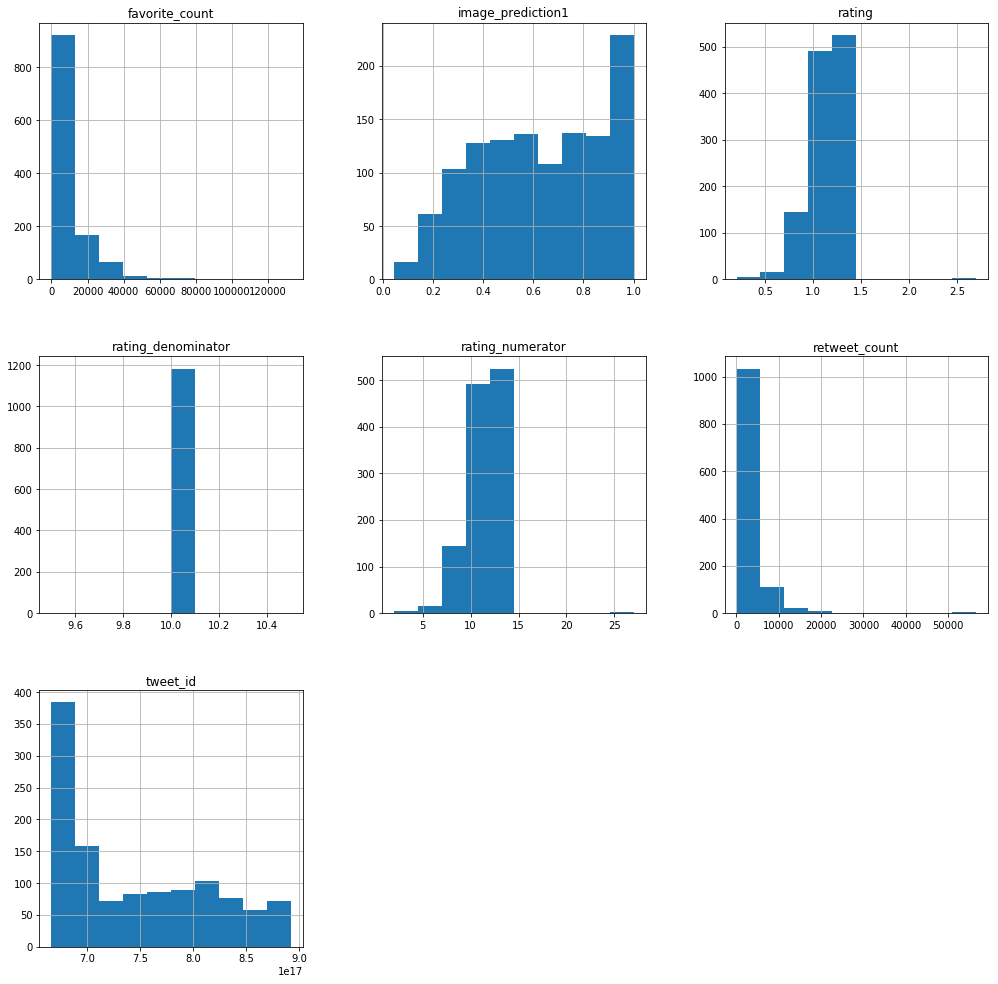

In [82]:
#exploring the data set to see the distribution

twitter_archive_master.hist(figsize=(17,17));

### Insight from Analysis

#### 1. What dog breed has the higest rating?

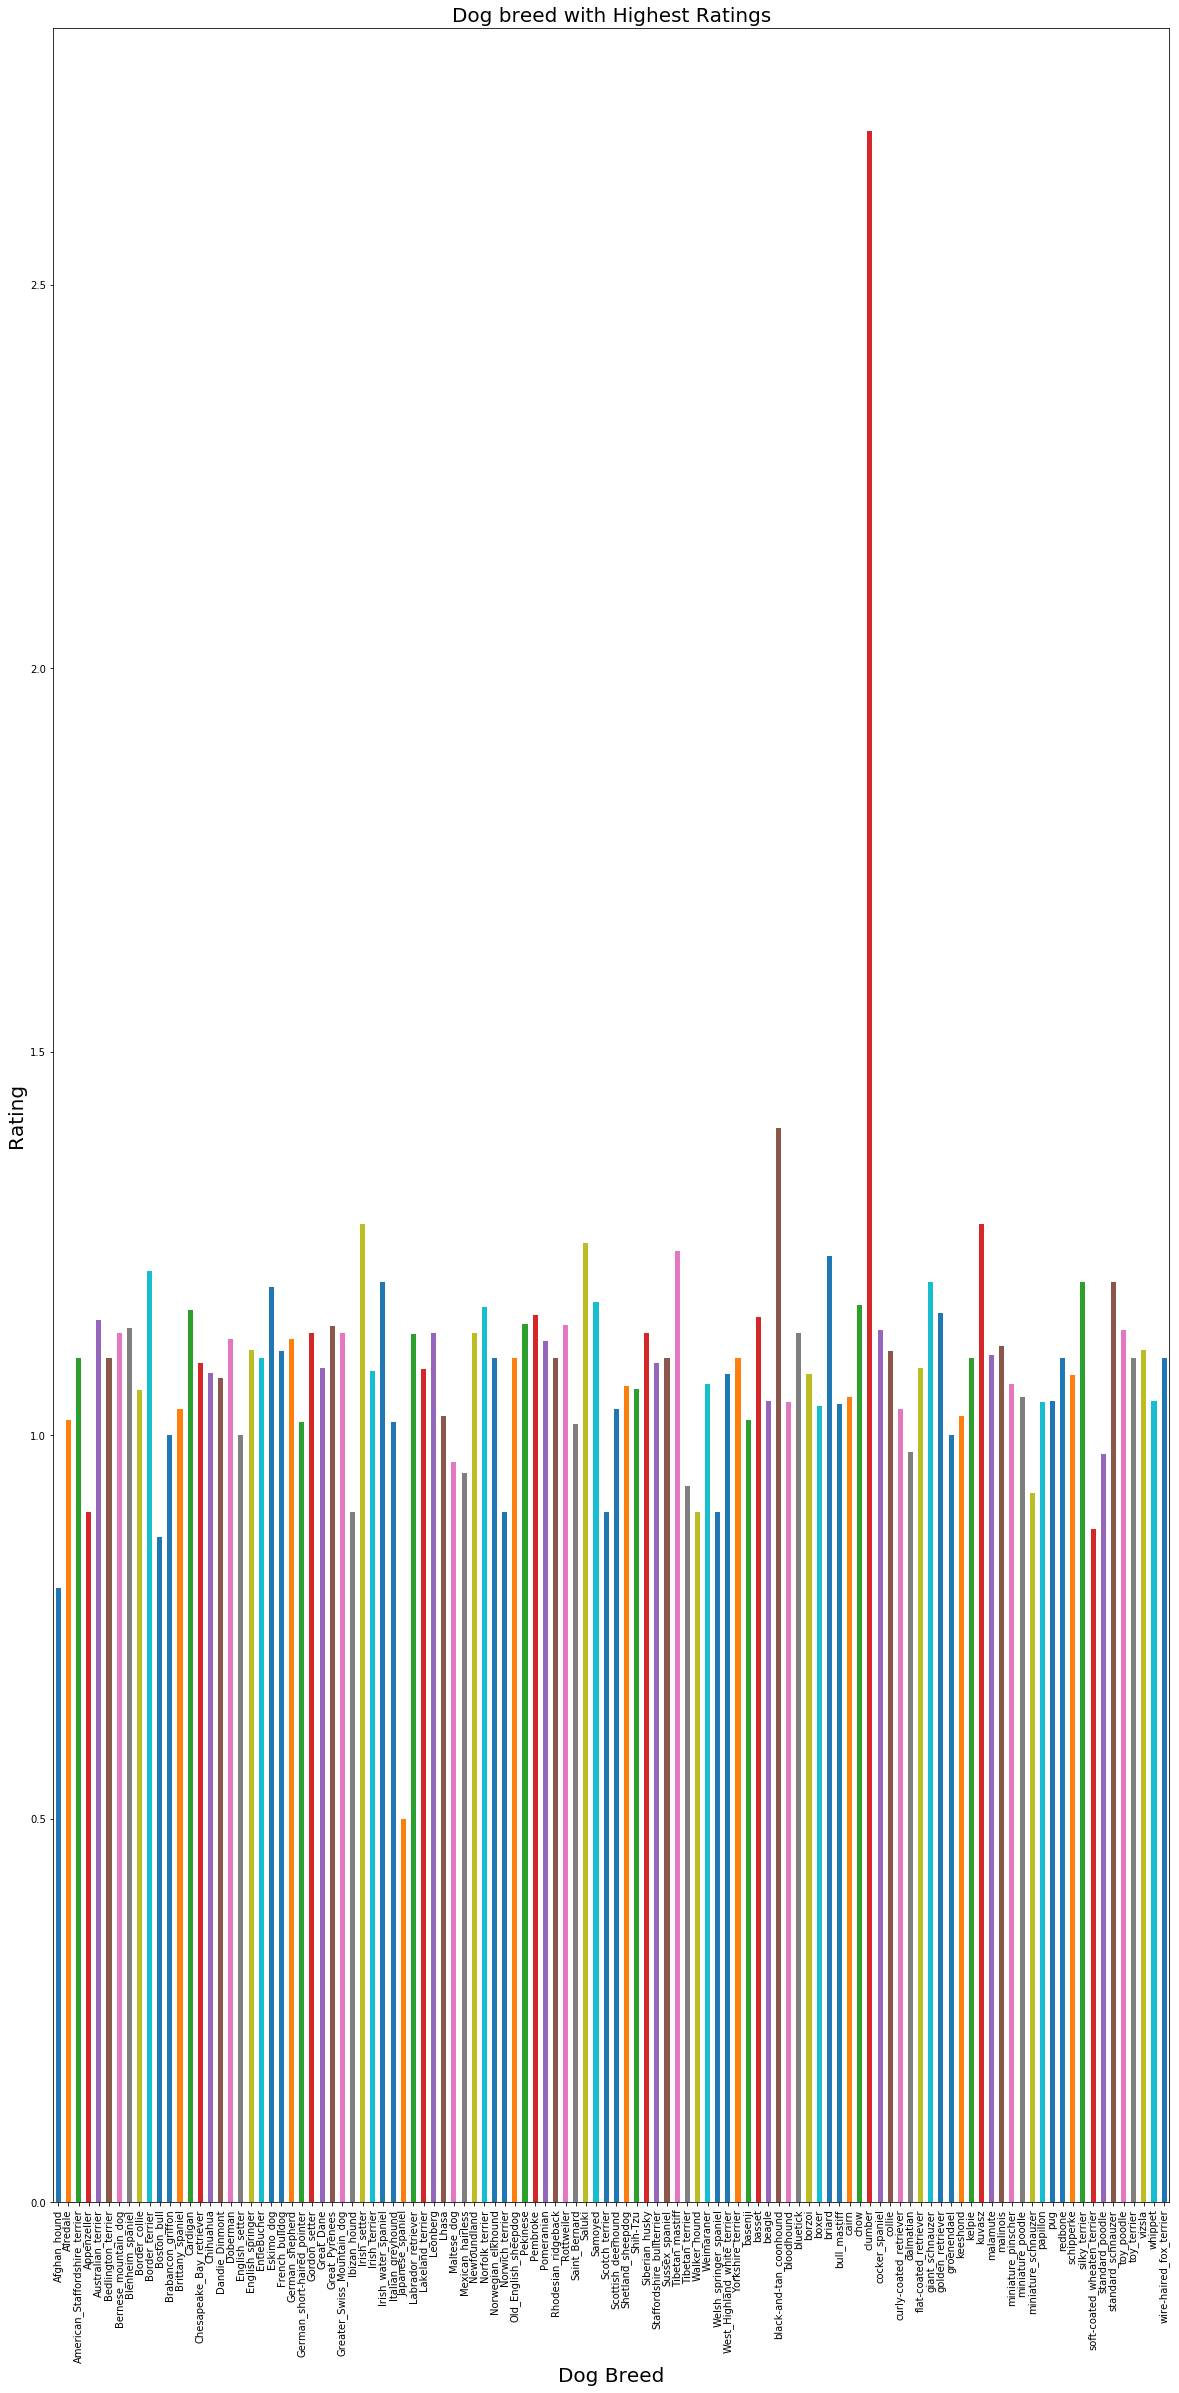

In [83]:
# Using a barchart
twitter_archive_master.groupby('dog_breed1')['rating'].mean().plot(kind='bar', figsize=(20,40))
plt.title('Dog breed with Highest Ratings', fontsize = 20)
plt.ylabel('Rating', fontsize = 20)
plt.xlabel('Dog Breed', fontsize = 20);

In [84]:
dog = twitter_archive_master.groupby('dog_breed1')['rating'].mean().idxmax()
dog

'clumber'

Answer
* The dog breed with the higest rating is clumber

#### 2. What dog has the higest population in dog breed?

(-5.7250000000000005, 114.72499999999999, 0.0, 123.90000000000001)

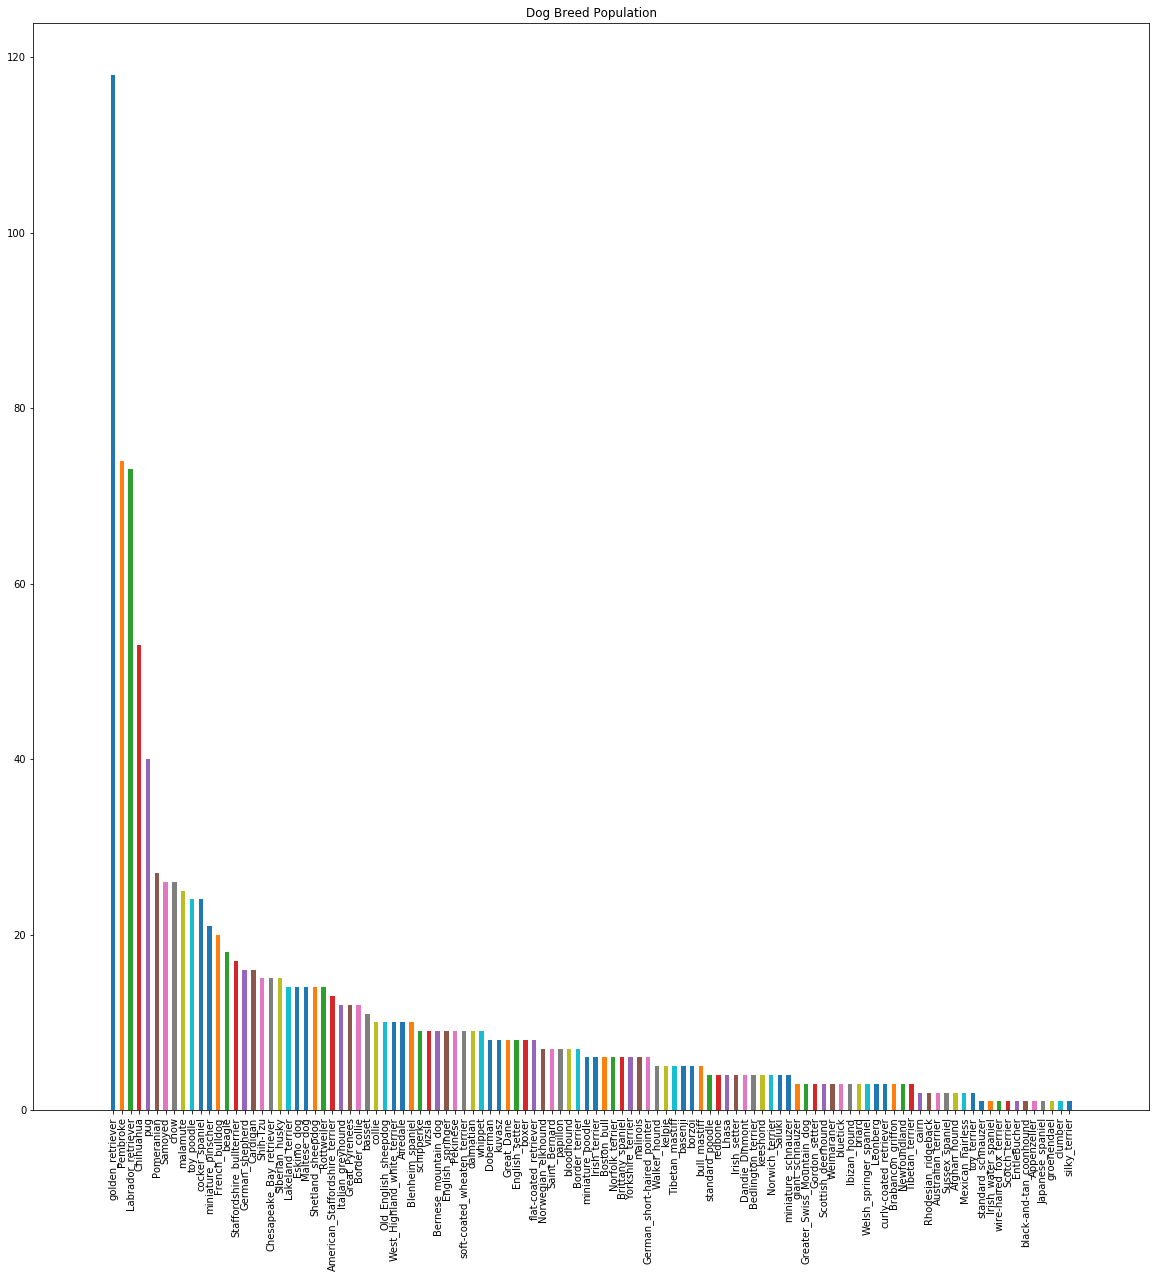

In [85]:
# Using Piechart
twitter_archive_master.dog_breed1.value_counts().plot(kind='bar', figsize=(20,20));
plt.title('Dog Breed Population')
plt.axis('equal')


In [86]:
twitter_archive_master.dog_breed1.value_counts()

golden_retriever                  118
Pembroke                           74
Labrador_retriever                 73
Chihuahua                          53
pug                                40
Pomeranian                         27
Samoyed                            26
chow                               26
malamute                           25
toy_poodle                         24
cocker_spaniel                     24
miniature_pinscher                 21
French_bulldog                     20
beagle                             18
Staffordshire_bullterrier          17
German_shepherd                    16
Cardigan                           16
Shih-Tzu                           15
Chesapeake_Bay_retriever           15
Siberian_husky                     15
Lakeland_terrier                   14
Eskimo_dog                         14
Maltese_dog                        14
Shetland_sheepdog                  14
Rottweiler                         14
American_Staffordshire_terrier     13
Italian_grey

Answer
* Golden retriever has the highest number in dog breed population.

#### 3. What dog breed has the highest likes and retweets?

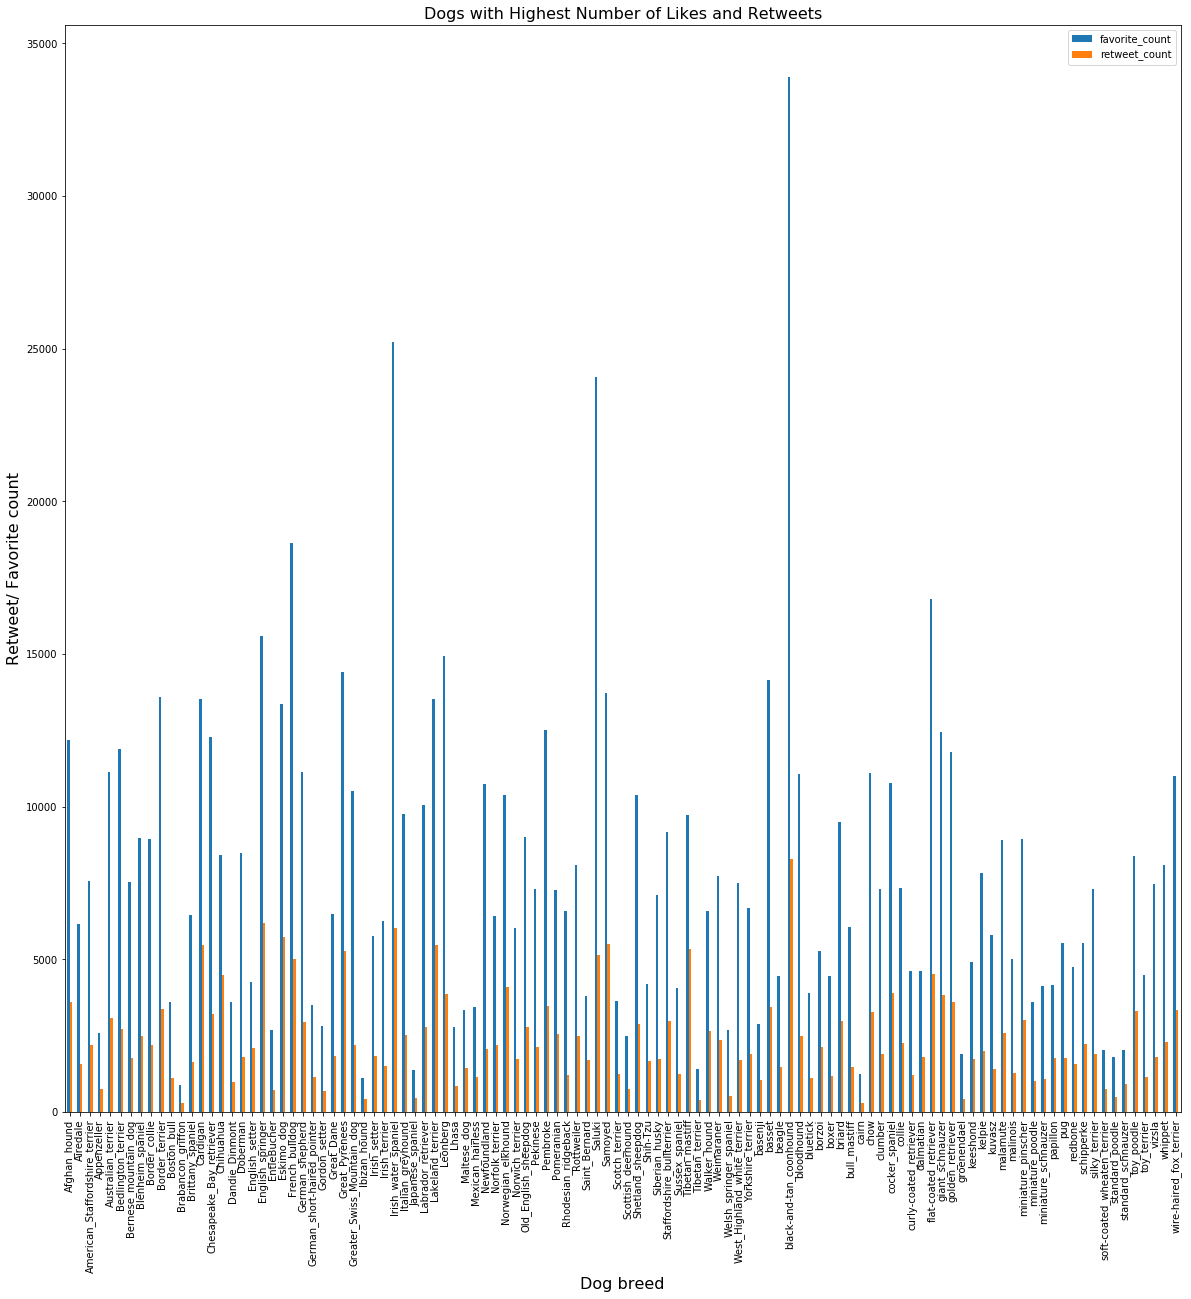

In [87]:
twitter_archive_master.groupby('dog_breed1')['favorite_count','retweet_count'].mean().plot(kind='bar',figsize=(20,20))
plt.title('Dogs with Highest Number of Likes and Retweets', fontsize = 16)
plt.ylabel('Retweet/ Favorite count', fontsize = 16)
plt.xlabel('Dog breed', fontsize = 16);


In [88]:
dog_breed =twitter_archive_master.groupby('dog_breed1')['favorite_count','retweet_count'].mean().idxmax()

In [89]:
dog_breed

favorite_count    black-and-tan_coonhound
retweet_count     black-and-tan_coonhound
dtype: object

Answer
* black-and-tan_coonhound has the highest number of retweets, while Puppo has the highest number of likes. 

#### Conclusion

<p> The above analysis may not be accurate, due to the amount of inaccurate and inconsistence data available.
The data set had a lot of invalid entries and as such, the accuracy of the analysis may be compromised. 
However, the following conclusions were derived. </p>

*  Clumber is the dog breed withthe highest ratings 
*  Golden retriever is the most popular dog stage with 128 values from the cleaned data.
*  black-and-tan_coonhound has the highest number of likes
*  black-and-tan_coonhound has the highest number of retweets.